In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [8]:
mnist_transform=transforms.Compose([
                              transforms.Resize((28,28)),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)) 
                              ])     

train_dataset = datasets.MNIST(root='./mnist_data', 
                                  train=True, 
                                  download=True, 
                                  transform=mnist_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=50, shuffle=True) 

validation_dataset = datasets.MNIST(root='./mnist_data', 
                                  train=False, 
                                  download=True, 
                                  transform=mnist_transform)

validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=50, shuffle=False) 

# contruct model architecture

In [9]:
class NN_MNIST(nn.Module):
  def __init__(self, NN_in, H, NN_out):
    super().__init__()
    self.linear1 = nn.Linear(NN_in, H)
    self.linear2 = nn.Linear(H, NN_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = self.linear2(x) # activation not needed for multi-class classification task
    return x

# make model instance 


In [10]:
torch.manual_seed(1)
model = NN_MNIST(784, 1000,10)
model

NN_MNIST(
  (linear1): Linear(in_features=784, out_features=1000, bias=True)
  (linear2): Linear(in_features=1000, out_features=10, bias=True)
)

# optimizer 

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss() # cf. BCE()

In [12]:
epochs = 10
running_loss_history = []
running_corrects_history = []

validation_running_loss_history = []
validation_running_corrects_history = []

for eno in range(epochs):

  running_loss = 0.0
  running_corrects = 0.0
  
  validation_running_loss = 0.0
  validation_running_corrects = 0.0

  for inputs, labels in train_loader:       
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #max function output(max, max_indices)
    _, pred_idx = torch.max(outputs, 1)    

    running_loss += loss.item() 
    running_corrects += torch.sum(pred_idx == labels.data)

  else:
    with torch.no_grad():
      for validation_inputs, validation_labels in validation_loader:      
        validation_inputs = validation_inputs.view(validation_inputs.shape[0], -1)
        validation_outputs = model(validation_inputs)
        validation_loss = criterion(validation_outputs, validation_labels)
        
        #max function output(max, max_indices)
        _, pred_idx = torch.max(validation_outputs, 1)   

        validation_running_loss += validation_loss.item()
        validation_running_corrects += torch.sum(pred_idx == validation_labels.data)

    epoch_loss = running_loss/len(train_loader) 
    running_loss_history.append(epoch_loss)
    epoch_acc = (running_corrects.float()/inputs.shape[0]*100)/len(train_loader) 
    running_corrects_history.append(epoch_acc)
    print('--------------- epoch: ', (eno+1), '---------------')
    print('training loss: {:.4f}, accuracy {:.4f}'.format(epoch_loss, epoch_acc.item()))   

    validation_epoch_loss = validation_running_loss/len(validation_loader) 
    validation_running_loss_history.append(validation_epoch_loss)
    validation_epoch_acc = (validation_running_corrects.float()/validation_inputs.shape[0]*100)/len(validation_loader) 
    validation_running_corrects_history.append(validation_epoch_acc)    
    print('validation loss: {:.4f}, accuracy {:.4f}'.format(validation_epoch_loss, validation_epoch_acc.item())) 

--------------- epoch:  1 ---------------
training loss: 0.3790, accuracy 88.6733
validation loss: 0.2192, accuracy 93.2000
--------------- epoch:  2 ---------------
training loss: 0.1865, accuracy 94.6083
validation loss: 0.1502, accuracy 95.6200
--------------- epoch:  3 ---------------
training loss: 0.1329, accuracy 96.1167
validation loss: 0.1221, accuracy 96.3300
--------------- epoch:  4 ---------------
training loss: 0.1045, accuracy 97.0100
validation loss: 0.1054, accuracy 96.7800
--------------- epoch:  5 ---------------
training loss: 0.0876, accuracy 97.4133
validation loss: 0.0892, accuracy 97.3900
--------------- epoch:  6 ---------------
training loss: 0.0742, accuracy 97.8233
validation loss: 0.0855, accuracy 97.3200
--------------- epoch:  7 ---------------
training loss: 0.0642, accuracy 98.1467
validation loss: 0.0772, accuracy 97.6100
--------------- epoch:  8 ---------------
training loss: 0.0555, accuracy 98.4333
validation loss: 0.0732, accuracy 97.7900
--------

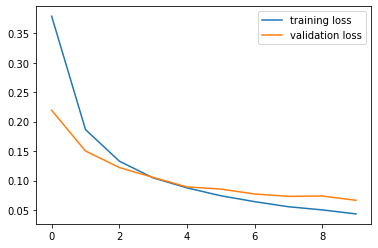

In [13]:
plt.plot(running_loss_history, label='training loss')
plt.plot(validation_running_loss_history, label='validation loss')
plt.legend()

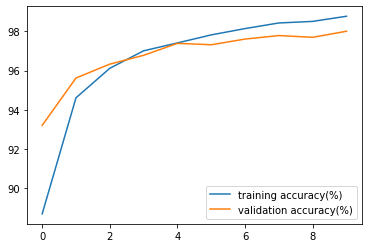

In [14]:
plt.plot(running_corrects_history, label='training accuracy(%)')
plt.plot(validation_running_corrects_history, label='validation accuracy(%)')
plt.legend()